In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import datetime

plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams.update({'font.size': 22})

In [2]:
#ratios = [0, 0.1, 0.3, 0.5, 1.0, 1.5, 2, 3, 4, 5, 6, 7]
pointtofile = '20180529/1Dgrid0.2in/Vacuum/'
ratios = [1]
forms = [0,1,2,3,4,5]
DATA = pd.DataFrame({'A' : []})

for j in ratios:
    for i in forms:
        filename = pointtofile + 'field_20Vcm_ratio'+str(j)+'/field_data_'+str(i)+'.txt'
        timename = 'time_'+str(j)+'_'+str(i)
        vcname = 'Vcath_'+str(j)+'_'+str(i)
        vaname = 'Vanode_'+str(j)+'_'+str(i)
        sumname = 'Vsum_'+str(j)+'_'+str(i)
        column_names = [timename, vcname, vaname]
        dataA = pd.read_csv(filename, sep="\t", skiprows=1, names=column_names)
        frames = [DATA,dataA]
        DATA=pd.concat(frames,axis=1)
        vcathmed = DATA[vcname].median()
        vanodemed = DATA[vaname].median()
        DATA[vcname] = DATA[vcname] - vcathmed
        DATA[vaname] = DATA[vaname] - vanodemed
        DATA[sumname] = DATA[vaname]+DATA[vcname]

    
DATA =DATA.drop('A',1)
cnnames = DATA.columns.get_values()
for k in cnnames:
    if k.startswith('time') == True:
        #print(k)
        DATA[k] = DATA[k] * 1.0E6
        #FULLDATA[k] = FULLDATA[k] - 0.1
    if (k.startswith('Vsum') == True) or (k.startswith('Vanode') == True) or (k.startswith('Vcath') == True):
        #print(k)
        DATA[k] = DATA[k] * 1.0E3
        #FULLDATA[k] = FULLDATA[k] - 0.1

DATA

,time_1_0,Vcath_1_0,Vanode_1_0,Vsum_1_0,time_1_1,Vcath_1_1,Vanode_1_1,Vsum_1_1,time_1_2,Vcath_1_2,...,Vanode_1_3,Vsum_1_3,time_1_4,Vcath_1_4,Vanode_1_4,Vsum_1_4,time_1_5,Vcath_1_5,Vanode_1_5,Vsum_1_5
0,-999.8,0.509098,-2.54543,-2.036332,-999.8,1.644738,-2.74123,-1.096492,-999.8,0.528678,...,-2.44753,-2.075502,-999.8,0.900693,-1.84053,-9.398370e-01,-999.8,0.039155,-1.95805,-1.918895
1,-999.6,-0.372011,-1.03774,-1.409751,-999.6,0.137053,-2.07551,-1.938457,-999.6,1.723060,...,-1.27272,-1.723083,-999.6,-0.215384,-1.27271,-1.488094e+00,-999.6,-0.450350,-0.93987,-1.390220
2,-999.4,1.507681,-1.78181,-0.274129,-999.4,0.332854,-1.76221,-1.429356,-999.4,0.998588,...,-1.21397,-0.567833,-999.4,1.155244,-1.01815,1.370940e-01,-999.4,1.664322,-2.29091,-0.626588
3,-999.2,-0.078321,-2.72166,-2.799981,-999.2,0.332854,-1.80139,-1.468536,-999.2,-0.391610,...,-1.44893,0.391604,-999.2,2.839142,-2.17339,6.657520e-01,-999.2,0.137061,-2.93704,-2.799979
4,-999.0,0.097897,-1.74265,-1.644753,-999.0,0.802789,-3.01537,-2.212581,-999.0,2.584589,...,-0.58740,1.468526,-999.0,0.920271,-3.11324,-2.192969e+00,-999.0,1.253139,-2.81956,-1.566421
5,-998.8,-0.078317,-0.48952,-0.567837,-998.8,1.174818,-2.23215,-1.057332,-998.8,-0.391603,...,-0.80278,-0.724465,-998.8,0.998599,-1.91884,-9.202410e-01,-998.8,1.899274,-3.25034,-1.351066
6,-998.6,0.626575,-3.56360,-2.937025,-998.6,-0.450343,0.88110,0.430757,-998.6,1.546841,...,-0.58740,0.176225,-998.6,0.900676,-1.40977,-5.090940e-01,-998.6,-0.411190,-0.74406,-1.155250
7,-998.4,1.605578,-3.19156,-1.585982,-998.4,0.763625,-3.50487,-2.741245,-998.4,0.254551,...,-0.54824,1.037758,-998.4,1.409769,-0.25453,1.155239e+00,-998.4,0.195801,-3.38740,-3.191599
8,-998.2,2.232160,-2.13424,0.097920,-998.2,0.489503,-1.62517,-1.135667,-998.2,1.781804,...,-1.05733,-0.019585,-998.2,1.155233,-3.48528,-2.330047e+00,-998.2,-0.097906,-1.21400,-1.311906
9,-998.0,0.939864,-2.19299,-1.253126,-998.0,0.841953,-2.01678,-1.174827,-998.0,1.409776,...,0.31328,2.251716,-998.0,0.195803,-2.17338,-1.977577e+00,-998.0,1.801379,-2.27133,-0.469951


In [3]:
list(DATA)


['time_1_0',
 'Vcath_1_0',
 'Vanode_1_0',
 'Vsum_1_0',
 'time_1_1',
 'Vcath_1_1',
 'Vanode_1_1',
 'Vsum_1_1',
 'time_1_2',
 'Vcath_1_2',
 'Vanode_1_2',
 'Vsum_1_2',
 'time_1_3',
 'Vcath_1_3',
 'Vanode_1_3',
 'Vsum_1_3',
 'time_1_4',
 'Vcath_1_4',
 'Vanode_1_4',
 'Vsum_1_4',
 'time_1_5',
 'Vcath_1_5',
 'Vanode_1_5',
 'Vsum_1_5']

Text(0,0.5,'voltage (mV)')

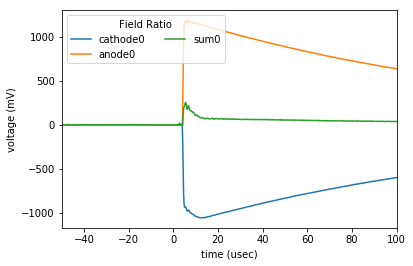

In [6]:
now = datetime.datetime.now()
datetimeforplots=now.strftime("%Y%m%d_%H%M")
#print(datetimeforplots)

cm = plt.cm.get_cmap('tab20c')
ratios = [1]#[0, 0.3, 0.5, 1.0, 1.5, 2, 3]
forms = [0]#[0,1,2,3,4,5]

j=1
for i in forms:
        timename = 'time_'+str(j)+'_'+str(i)
        vcname = 'Vcath_'+str(j)+'_'+str(i)
        vaname = 'Vanode_'+str(j)+'_'+str(i)
        sumname = 'Vsum_'+str(j)+'_'+str(i)
        clabel = 'cathode'+str(i)
        alabel = 'anode'+str(i)
        slabel = 'sum'+str(i)
        if i == 0:
            ax1 = DATA.plot(timename,vcname,label=clabel)
            DATA.plot(timename,vaname,label=alabel,ax=ax1)
            DATA.plot(timename,sumname,label=slabel,ax=ax1)

        else:
            DATA.plot(timename,vcname,label=clabel,ax=ax1)
            DATA.plot(timename,vaname,label=alabel,ax=ax1)
            DATA.plot(timename,sumname,label=slabel,ax=ax1)



#for j in ratios:
#    if j == 0:
#        timename = 'time_'+str(j)+'_'+str(version)
#        sumname = 'Vsum_'+str(j)+'_'+str(version)
#        label = str(j)
#        ax1 = DATA.plot(timename,sumname,label=label)
#    else:
#        timename = 'time_'+str(j)+'_'+str(version)
#        sumname = 'Vsum_'+str(j)+'_'+str(version)
#        label = str(j)
#        DATA.plot(timename,sumname,ax=ax1,label=label)
plt.xlim(-10,500)
#plt.ylim(0,10)
plt.legend(title = 'Field Ratio',ncol=2)
        
#DATA.plot('time_0_0','Vanode_0_0',ax=ax1)
#DATA.plot('time_0_0','Vcath_0_0',ax=ax1)
plt.xlim(-50,100)
plt.xlabel('time (usec)')
plt.ylabel('voltage (mV)')
#plt.savefig('1Dgrid_testing_'+datetimeforplots+'.png')

In [7]:

#ax1 = DATA.plot('time0','Vsum0',legend=False)

DATA.plot('time1','Vsum1',ax=ax1,legend=False)
DATA.plot('time2','Vsum2',ax=ax1,legend=False)
DATA.plot('time3','Vsum3',ax=ax1,legend=False)
DATA.plot('time4','Vsum4',ax=ax1,legend=False)
DATA.plot('time5','Vsum5',ax=ax1,legend=False)


plt.xlim(-20,100)
plt.ylim(-100,100)
plt.xlabel('time (us)')
plt.ylabel('voltage (mV)')
plt.yticks(np.arange(-100, 110, step=50))
#plt.xticks(np.arange(-0, 41, step=2))
#plt.title('Sum (Anode + Cathode) Waveform')
plt.draw()
#plt.savefig('waveform_sums.png')


KeyError: 'time1'

In [8]:
DATA['min'] = DATA.Vsum1[(DATA.Vsum1.shift(1) > DATA.Vsum1) & (DATA.Vsum1.shift(-1) > DATA.Vsum1)]
#df['max'] = df.data[(df.data.shift(1) < df.data) & (df.data.shift(-1) < df.data)]

AttributeError: 'DataFrame' object has no attribute 'Vsum1'

In [9]:
ax2 = DATA.plot('time1','Vsum1')
plt.scatter(DATA['time1'], DATA['min'], c='r')
plt.xlim(0,30)

KeyError: 'time1'

In [10]:
extremes = pd.DataFrame()
extremes['mintimes'] = DATA['time1']

extremes['minima']=DATA['min']
extremes = extremes.dropna()

extremes

KeyError: 'time1'

In [11]:
ax3 = DATA.plot('time1','Vsum1')
plt.scatter(extremes['mintimes'], extremes['minima'], c='r',label='minima')
plt.xlim(0,30)
plt.xlabel('time, us')
plt.ylabel('V')
plt.legend()
plt.show()

KeyError: 'time1'

In [12]:
extremes.loc[(extremes['mintimes'] > 4) & (extremes['mintimes'] < 25)]

#THESE SHOW A WAVELENGTH OF 2 usec.

KeyError: 'mintimes'